In [1]:
#AA    : American Airlines
#AAPL  : Apple
#DAL   : Delta Airlines
#GE    : General Electric
#IBM   : International Business Machines
#KO    : Coca Cola
#MSFT  : Microsoft 
#PEP   : Pepsi Co
#SP500 : S & P 500 
#UAL   : United Airlines

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#The following 3 cells prepare dataframes with daily, weekly and 
#monthly adjusted close pr
sp500 = pd.read_csv('sp500_data_201201_201905.csv')
sp500_adj_close = sp500[['Date', 'Adj Close']]
sp500_adj_close['Ticker'] = ['SP500'] * sp500_adj_close.shape[0]
sp500_adj_close = sp500_adj_close[['Ticker', 'Date', 'Adj Close']]
stocks = pd.read_csv('stock_data_201201_201905.csv')
stocks_adj_close = stocks[['Ticker', 'Date', 'Adj Close']]
data = pd.concat([sp500_adj_close, stocks_adj_close])
data.index = pd.to_datetime(data.index)

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [4]:
def resample_df(df, per):
    m_df = pd.DataFrame()
    cols = df.columns
    for c in cols:
        d = data_adj_close[c].resample(per).first()
        m_df = pd.concat([m_df, d], axis=1) 
                
    return m_df

In [5]:
data_adj_close = data.pivot(index='Date', columns='Ticker', values='Adj Close')
data_adj_close.index = pd.to_datetime(data_adj_close.index)
daily_adj_close = data_adj_close.copy()
weekly_adj_close = resample_df(data_adj_close, 'W-MON')
monthly_adj_close = resample_df(data_adj_close, 'BMS')

In [6]:
#Calculate daily, weekly and monthly return
daily_rets = ((daily_adj_close - daily_adj_close.shift(1))/(daily_adj_close.shift(1)))
weekly_rets = ((weekly_adj_close - weekly_adj_close.shift(1))/(weekly_adj_close.shift(1)))
monthly_rets = ((monthly_adj_close - monthly_adj_close.shift(1))/(monthly_adj_close.shift(1)))
daily_rets.index = data_adj_close.index
weekly_rets.index = weekly_adj_close.index
monthly_rets.index = monthly_adj_close.index
daily_rets = daily_rets.dropna()
weekly_rets = weekly_rets.dropna()
monthly_rets = monthly_rets.dropna()

In [7]:
#Remove data from all return frames for Jan, 2012
daily_rets = daily_rets[~((daily_rets.index.month == 1) & (daily_rets.index.year == 2012))]
weekly_rets = weekly_rets[~((weekly_rets.index.month == 1) & (weekly_rets.index.year == 2012))]
monthly_rets = monthly_rets[~((monthly_rets.index.month == 1) & (monthly_rets.index.year == 2012))]

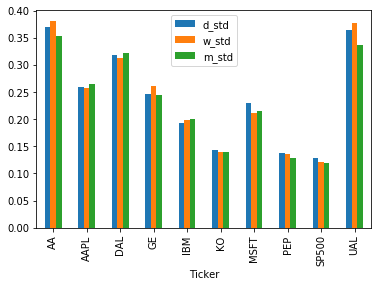

In [8]:
#Annualize standard deviation from daily, weekly and monthly returns data
#and plot them for each security
d_std = pd.Series(daily_rets.std()*math.sqrt(252), name='d_std')
w_std = pd.Series(weekly_rets.std()*math.sqrt(52), name='w_std')
m_std = pd.Series(monthly_rets.std()*math.sqrt(12), name='m_std')
all_std = pd.merge(d_std, w_std, left_index=True, right_index=True).merge(m_std, left_index=True, right_index=True)
all_std.plot(kind='bar')
plt.show()

In [9]:
#Steps to determine if returns are iid ( i.e. independent and identically distributed )
#The following 4 cells are for verifying the above statement

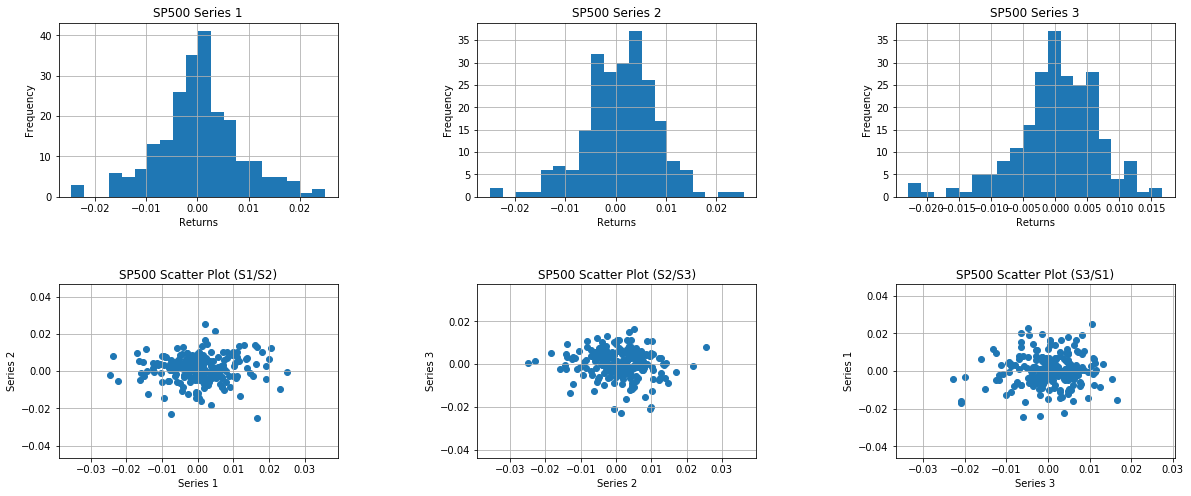

In [10]:
#SP500
sp_1 = daily_rets.SP500.iloc[:225]
sp_2 = daily_rets.SP500.iloc[225:450]
sp_3 = daily_rets.SP500.iloc[450:675]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax1.hist(sp_1, bins=20)
ax1.grid()
ax1.set(xlabel='Returns', ylabel='Frequency', title='SP500 Series 1')
ax2.hist(sp_2, bins=20)
ax2.grid()
ax2.set(xlabel='Returns', ylabel='Frequency', title='SP500 Series 2')
ax3.hist(sp_3, bins=20)
ax3.grid()
ax3.set(xlabel='Returns', ylabel='Frequency', title='SP500 Series 3')

ax4.scatter(sp_1, sp_2)
ax4.grid()
ax4.set(xlabel='Series 1', ylabel='Series 2', title='SP500 Scatter Plot (S1/S2)')
ax5.scatter(sp_2, sp_3)
ax5.grid()
ax5.set(xlabel='Series 2', ylabel='Series 3', title='SP500 Scatter Plot (S2/S3)')
ax6.scatter(sp_3, sp_1)
ax6.grid()
ax6.set(xlabel='Series 3', ylabel='Series 1', title='SP500 Scatter Plot (S3/S1)')

plt.show()

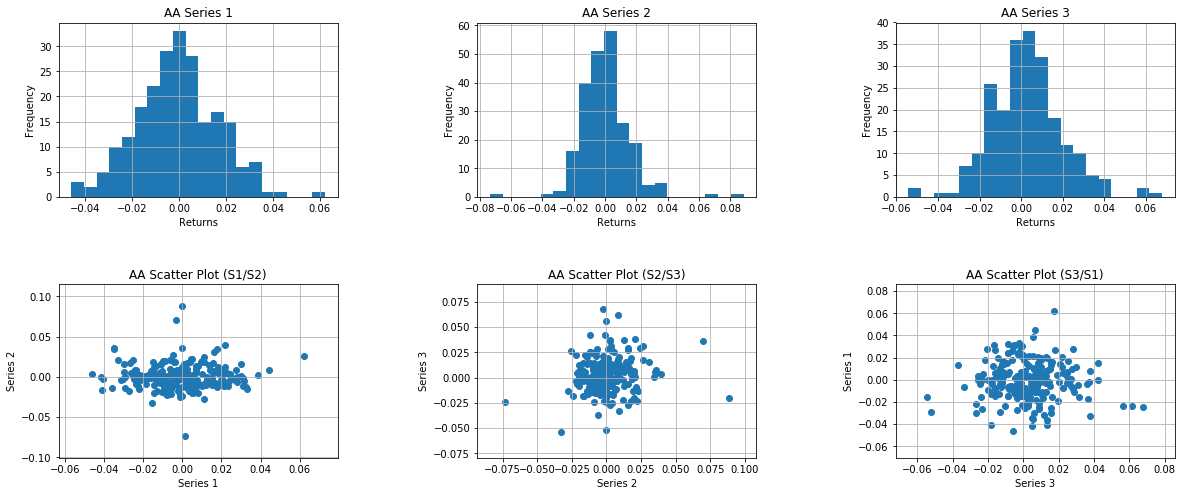

In [11]:
#AA
aa_1 = daily_rets.AA.iloc[:225]
aa_2 = daily_rets.AA.iloc[225:450]
aa_3 = daily_rets.AA.iloc[450:675]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax1.hist(aa_1, bins=20)
ax1.grid()
ax1.set(xlabel='Returns', ylabel='Frequency', title='AA Series 1')
ax2.hist(aa_2, bins=20)
ax2.grid()
ax2.set(xlabel='Returns', ylabel='Frequency', title='AA Series 2')
ax3.hist(aa_3, bins=20)
ax3.grid()
ax3.set(xlabel='Returns', ylabel='Frequency', title='AA Series 3')

ax4.scatter(aa_1, aa_2)
ax4.grid()
ax4.set(xlabel='Series 1', ylabel='Series 2', title='AA Scatter Plot (S1/S2)')
ax5.scatter(aa_2, aa_3)
ax5.grid()
ax5.set(xlabel='Series 2', ylabel='Series 3', title='AA Scatter Plot (S2/S3)')
ax6.scatter(aa_3, aa_1)
ax6.grid()
ax6.set(xlabel='Series 3', ylabel='Series 1', title='AA Scatter Plot (S3/S1)')

plt.show()

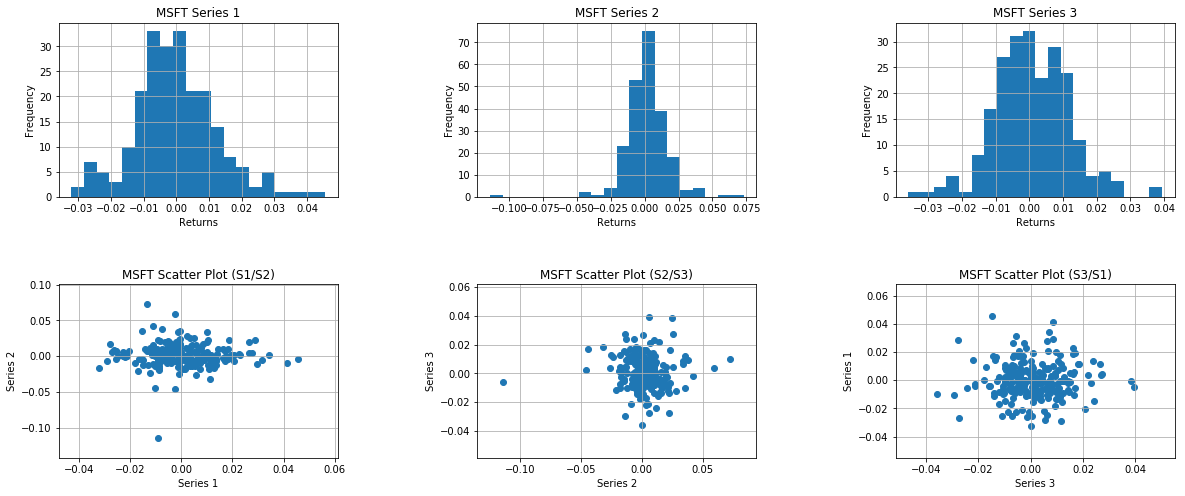

In [12]:
#MSFT
msft_1 = daily_rets.MSFT.iloc[:225]
msft_2 = daily_rets.MSFT.iloc[225:450]
msft_3 = daily_rets.MSFT.iloc[450:675]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax1.hist(msft_1, bins=20)
ax1.grid()
ax1.set(xlabel='Returns', ylabel='Frequency', title='MSFT Series 1')
ax2.hist(msft_2, bins=20)
ax2.grid()
ax2.set(xlabel='Returns', ylabel='Frequency', title='MSFT Series 2')
ax3.hist(msft_3, bins=20)
ax3.grid()
ax3.set(xlabel='Returns', ylabel='Frequency', title='MSFT Series 3')

ax4.scatter(msft_1, msft_2)
ax4.grid()
ax4.set(xlabel='Series 1', ylabel='Series 2', title='MSFT Scatter Plot (S1/S2)')
ax5.scatter(msft_2, msft_3)
ax5.grid()
ax5.set(xlabel='Series 2', ylabel='Series 3', title='MSFT Scatter Plot (S2/S3)')
ax6.scatter(msft_3, msft_1)
ax6.grid()
ax6.set(xlabel='Series 3', ylabel='Series 1', title='MSFT Scatter Plot (S3/S1)')

plt.show()

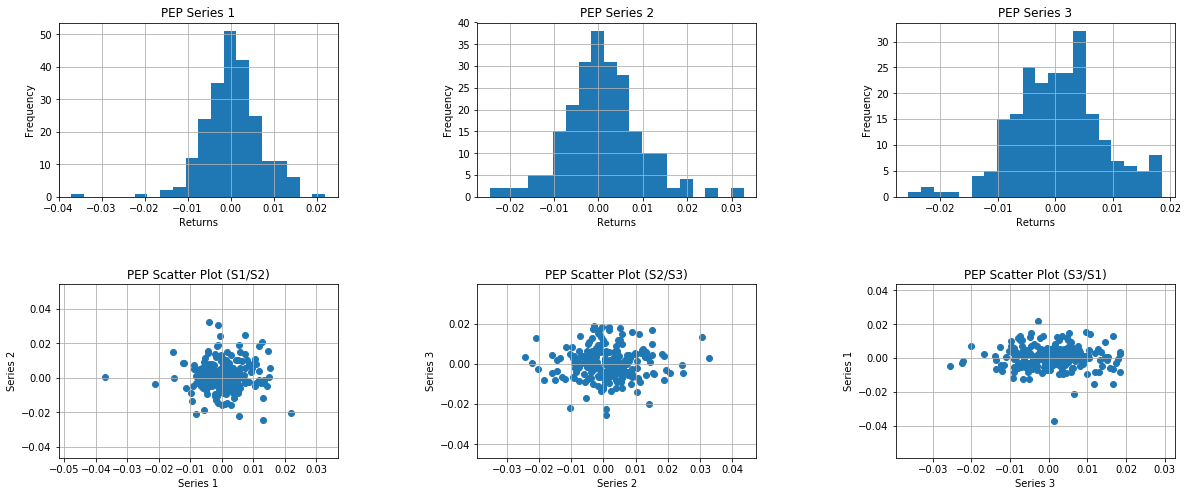

In [13]:
#PEP
pep_1 = daily_rets.PEP.iloc[:225]
pep_2 = daily_rets.PEP.iloc[225:450]
pep_3 = daily_rets.PEP.iloc[450:675]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax1.hist(pep_1, bins=20)
ax1.grid()
ax1.set(xlabel='Returns', ylabel='Frequency', title='PEP Series 1')
ax2.hist(pep_2, bins=20)
ax2.grid()
ax2.set(xlabel='Returns', ylabel='Frequency', title='PEP Series 2')
ax3.hist(pep_3, bins=20)
ax3.grid()
ax3.set(xlabel='Returns', ylabel='Frequency', title='PEP Series 3')

ax4.scatter(pep_1, pep_2)
ax4.grid()
ax4.set(xlabel='Series 1', ylabel='Series 2', title='PEP Scatter Plot (S1/S2)')
ax5.scatter(pep_2, pep_3)
ax5.grid()
ax5.set(xlabel='Series 2', ylabel='Series 3', title='PEP Scatter Plot (S2/S3)')
ax6.scatter(pep_3, pep_1)
ax6.grid()
ax6.set(xlabel='Series 3', ylabel='Series 1', title='PEP Scatter Plot (S3/S1)')

plt.show()

In [14]:
#Steps to visualize lognormal nature of stock prices 

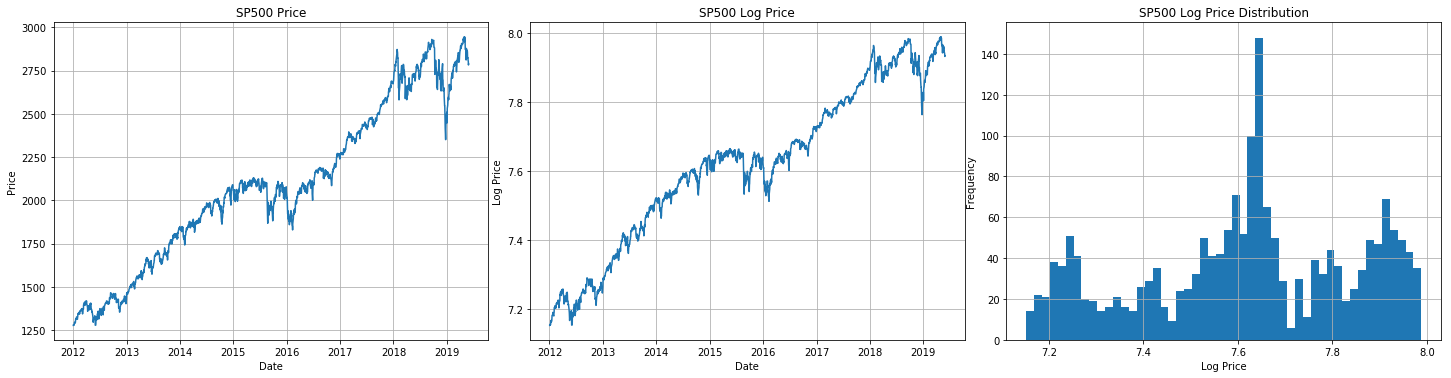

In [15]:
#SP500
sp500 = daily_adj_close.loc[:, ['SP500']]
sp500['ln_price'] = np.log(sp500['SP500'])
sp500.columns = ['price', 'ln_price']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.tight_layout()
ax1.plot(sp500.index, sp500.price)
ax1.set(xlabel='Date', ylabel='Price', title='SP500 Price')
ax1.grid()

ax2.plot(sp500.index, sp500.ln_price)
ax2.set(xlabel='Date', ylabel='Log Price', title='SP500 Log Price')
ax2.grid()

ax3.hist(sp500.ln_price, bins=50)
ax3.set(xlabel='Log Price', ylabel='Frequency', title='SP500 Log Price Distribution')
ax3.grid()

plt.show()

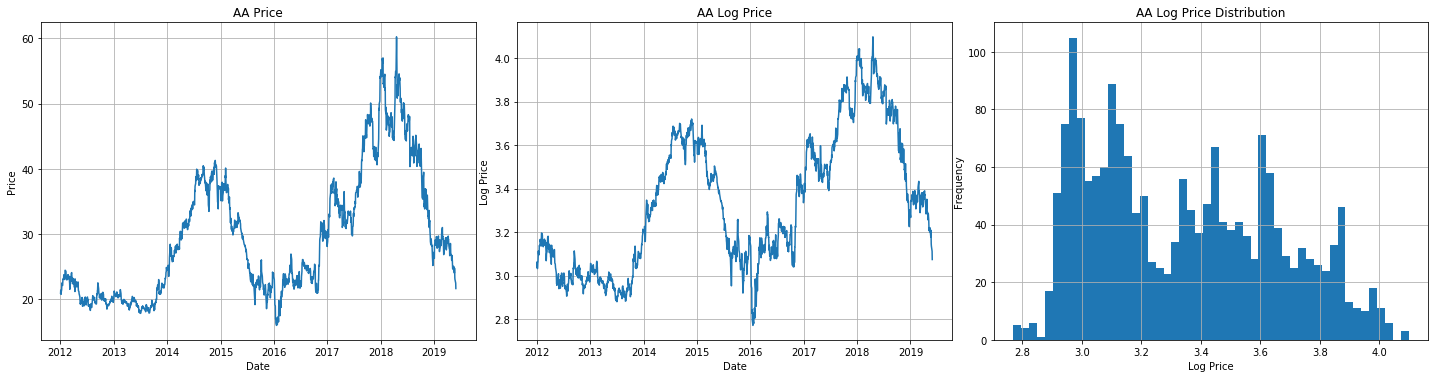

In [16]:
#AA
aa = daily_adj_close.loc[:, ['AA']]
aa['ln_price'] = np.log(aa['AA'])
aa.columns = ['price', 'ln_price']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.tight_layout()
ax1.plot(aa.index, aa.price)
ax1.set(xlabel='Date', ylabel='Price', title='AA Price')
ax1.grid()

ax2.plot(aa.index, aa.ln_price)
ax2.set(xlabel='Date', ylabel='Log Price', title='AA Log Price')
ax2.grid()

ax3.hist(aa.ln_price, bins=50)
ax3.set(xlabel='Log Price', ylabel='Frequency', title='AA Log Price Distribution')
ax3.grid()

plt.show()

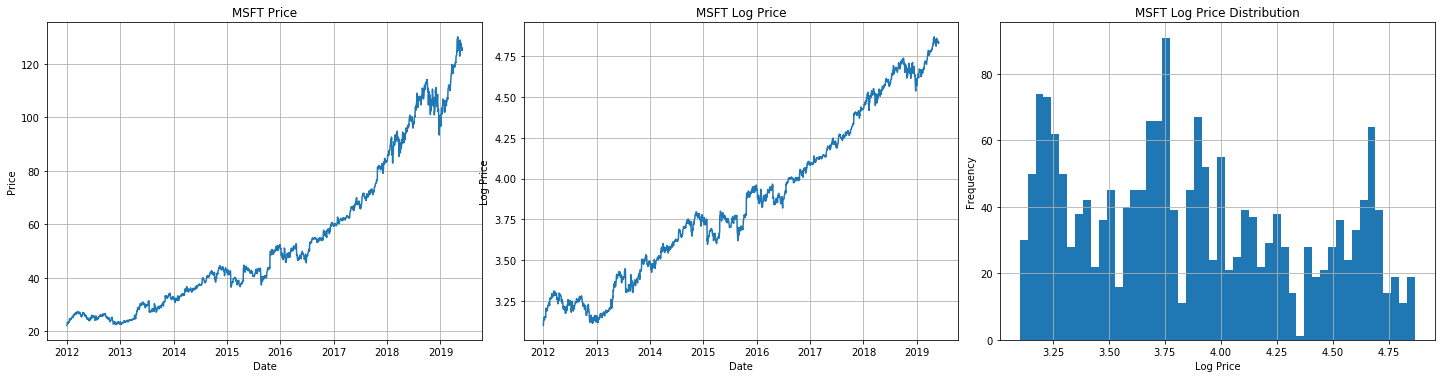

In [17]:
#MSFT
msft = daily_adj_close.loc[:, ['MSFT']]
msft['ln_price'] = np.log(msft['MSFT'])
msft.columns = ['price', 'ln_price']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.tight_layout()
ax1.plot(msft.index, msft.price)
ax1.set(xlabel='Date', ylabel='Price', title='MSFT Price')
ax1.grid()

ax2.plot(msft.index, msft.ln_price)
ax2.set(xlabel='Date', ylabel='Log Price', title='MSFT Log Price')
ax2.grid()

ax3.hist(msft.ln_price, bins=50)
ax3.set(xlabel='Log Price', ylabel='Frequency', title='MSFT Log Price Distribution')
ax3.grid()

plt.show()

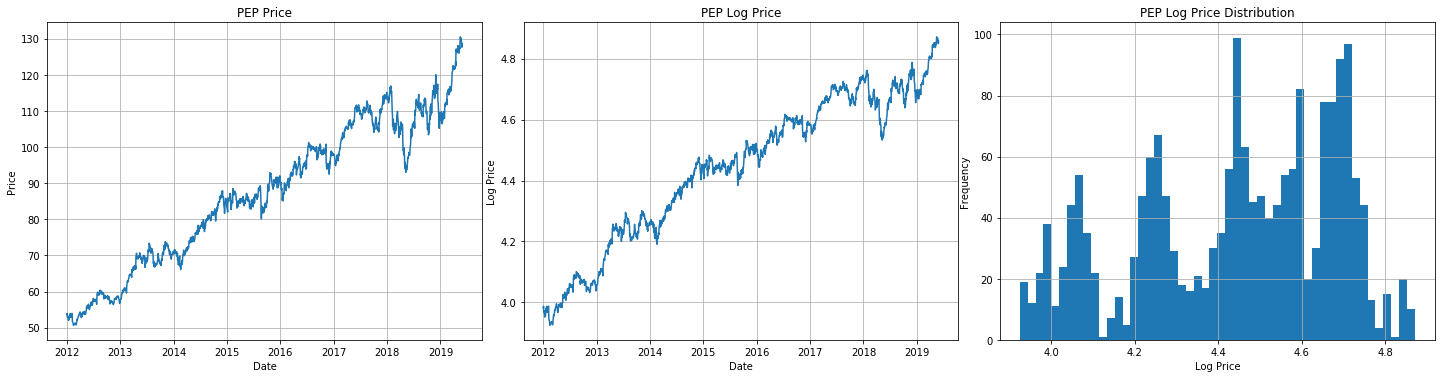

In [18]:
#PEP
pep = daily_adj_close.loc[:, ['PEP']]
pep['ln_price'] = np.log(pep['PEP'])
pep.columns = ['price', 'ln_price']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.tight_layout()
ax1.plot(pep.index, pep.price)
ax1.set(xlabel='Date', ylabel='Price', title='PEP Price')
ax1.grid()

ax2.plot(pep.index, pep.ln_price)
ax2.set(xlabel='Date', ylabel='Log Price', title='PEP Log Price')
ax2.grid()

ax3.hist(pep.ln_price, bins=50)
ax3.set(xlabel='Log Price', ylabel='Frequency', title='PEP Log Price Distribution')
ax3.grid()

plt.show()

In [19]:
#Calculate arithmetic and geometric sum of arithemetic and logarithmic returns

In [20]:
dailies = daily_adj_close.copy()
a_returns = ( dailies - dailies.shift(1))/(dailies.shift(1)).dropna()
l_returns = np.log(dailies/dailies.shift(1)).dropna()

cols = list(dailies.columns)
a_ret_cols = [ 'a_ret_' + val for val in cols ]
l_ret_cols = [ 'l_ret_' + val for val in cols ]
a_returns.columns = a_ret_cols
l_returns.columns = l_ret_cols

all_dailies = pd.concat([dailies, a_returns, l_returns], axis=1)

In [21]:
def geo_sum(df, col):
    g_sum = 1
    for r in df[col].values:
        g_sum = g_sum * ( 1 + r )
    
    g_sum = math.pow(g_sum, 1/len(df)) - 1
    return g_sum

<Figure size 432x288 with 0 Axes>

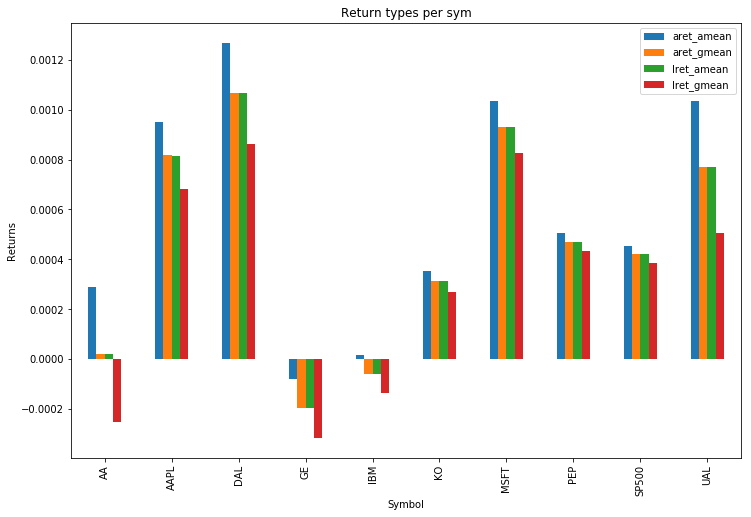

,aret_amean,aret_gmean,lret_amean,lret_gmean
AA,0.000288388,1.83592e-05,1.8359e-05,-0.000253222
AAPL,0.000950708,0.000816299,0.000815966,0.000680847
DAL,0.00126923,0.00106619,0.00106562,0.000861708
GE,-7.86161e-05,-0.000197488,-0.000197508,-0.000316376
IBM,1.52867e-05,-5.95005e-05,-5.95023e-05,-0.000134975
KO,0.000351847,0.000311443,0.000311394,0.000270693
MSFT,0.00103563,0.000930992,0.000930559,0.000825898
PEP,0.000506986,0.000469702,0.000469592,0.000432284
SP500,0.000452408,0.000419568,0.00041948,0.000386554
UAL,0.00103639,0.000771628,0.000771331,0.000505322


In [22]:
cols = list(dailies.columns)
ret_df = pd.DataFrame(columns=['aret_amean', 'aret_gmean', 'lret_amean', 'lret_gmean'])
for col in cols:
    t_cols = [col, 'a_ret_' + col, 'l_ret_' + col]
    temp_df = all_dailies[t_cols].dropna()
    temp_aret_amean = temp_df['a_ret_' + col].mean()
    temp_aret_gmean = geo_sum(temp_df, 'a_ret_' + col)
    temp_lret_amean = temp_df['l_ret_' + col].mean()
    temp_lret_gmean = geo_sum(temp_df, 'l_ret_' + col)
    ret_df.loc[col,] = [ temp_aret_amean, temp_aret_gmean, temp_lret_amean, temp_lret_gmean ]

fig = plt.figure()
ret_df.plot(kind='bar', figsize=(12, 8), title='Return types per sym')
plt.xlabel('Symbol')
plt.ylabel('Returns')
plt.show()
ret_df

In [23]:
#Calculate and plot beta of each stock with respect to SP500

<Figure size 432x288 with 0 Axes>

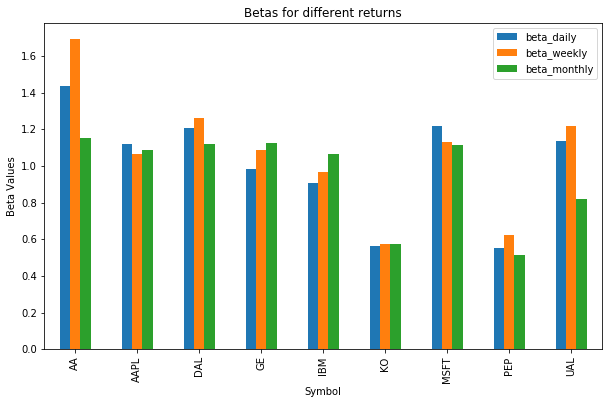

In [24]:
def calculate_beta(df):
    beta_df = pd.DataFrame(columns=['Symbol', 'Beta'])
    cols = list(df.columns)
    cols = [ val for val in cols if val != 'SP500' ]
    for ind in range(0, len(cols)):
        c = cols[ind]
        beta_df.loc[ind] = [ c, df[c].cov(df.SP500) / df.loc[:, 'SP500'].var() ]
        
    return beta_df.set_index('Symbol')
        
beta_from_daily = calculate_beta(daily_rets)
beta_from_weekly = calculate_beta(weekly_rets)
beta_from_monthly = calculate_beta(monthly_rets)

betas = pd.concat([beta_from_daily, beta_from_weekly, beta_from_monthly], axis=1)
betas.columns = ['beta_daily', 'beta_weekly', 'beta_monthly']

fig = plt.figure()
betas.plot(kind='bar', title='Betas for different returns', figsize=(10, 6))
plt.xlabel('Symbol')
plt.ylabel('Beta Values')
plt.show()

In [25]:
#Calculate rolling beta for stocks

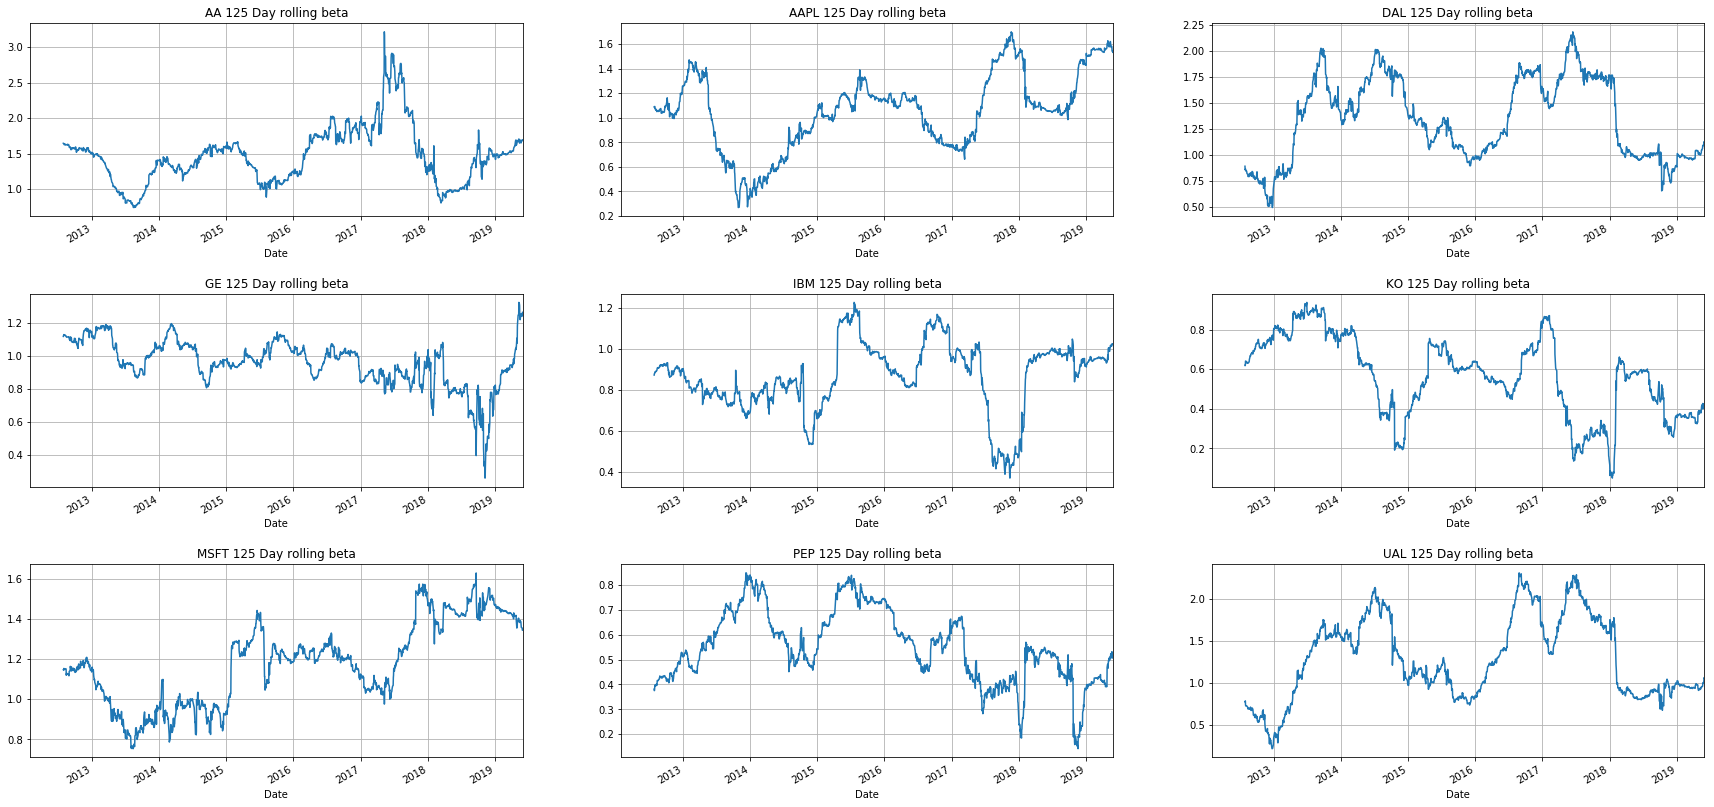

In [26]:
cols = list(daily_rets.columns)
cols = [ val for val in cols if val != 'SP500' ]

fig, axes = plt.subplots(3, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
row=col=0
ind = 0

beta_df = pd.DataFrame()

while row != 3:
    col = 0 
    while col != 3:
        c = cols[ind]
        df = daily_rets[[c, 'SP500']]
        r1 = df.rolling(window=125)
        r2 = df['SP500'].rolling(window=125)
        r_cov = r1[[c]].cov(r2)
        r_var = df['SP500'].rolling(window=125).var()
        b = r_cov[c]/r_var
        b.plot(title=c+' 125 Day rolling beta', grid=True, figsize=(30, 15), ax=axes[row][col])
        col = col + 1
        ind = ind + 1
        b = pd.Series(b, name=c)
        beta_df = pd.concat([beta_df, b], axis=1)
    row = row + 1
    

In [27]:
#Verify relation of rolling beta with rolling mean and rolling standard deviation

In [30]:
beta_df_125 = beta_df.dropna()
mean_rets_125 = daily_rets.rolling(window=125).mean().dropna()
std_rets_125 = daily_rets.rolling(window=125).std().dropna()

syms = list(beta_df_125.columns)

beta_df_cols = [ 'beta_' + val for val in syms ]
beta_df_125.columns = beta_df_cols

mean_rets_125 = mean_rets_125[syms]
mean_rets_125_cols = [ 'mr_' + val for val in syms ]
mean_rets_125.columns = mean_rets_125_cols

std_rets_125 = std_rets_125[syms]
std_rets_125_cols = [ 'std_' + val for val in syms ]
std_rets_125.columns = std_rets_125_cols

data_df = pd.concat([beta_df_125, mean_rets_125, std_rets_125], axis=1)

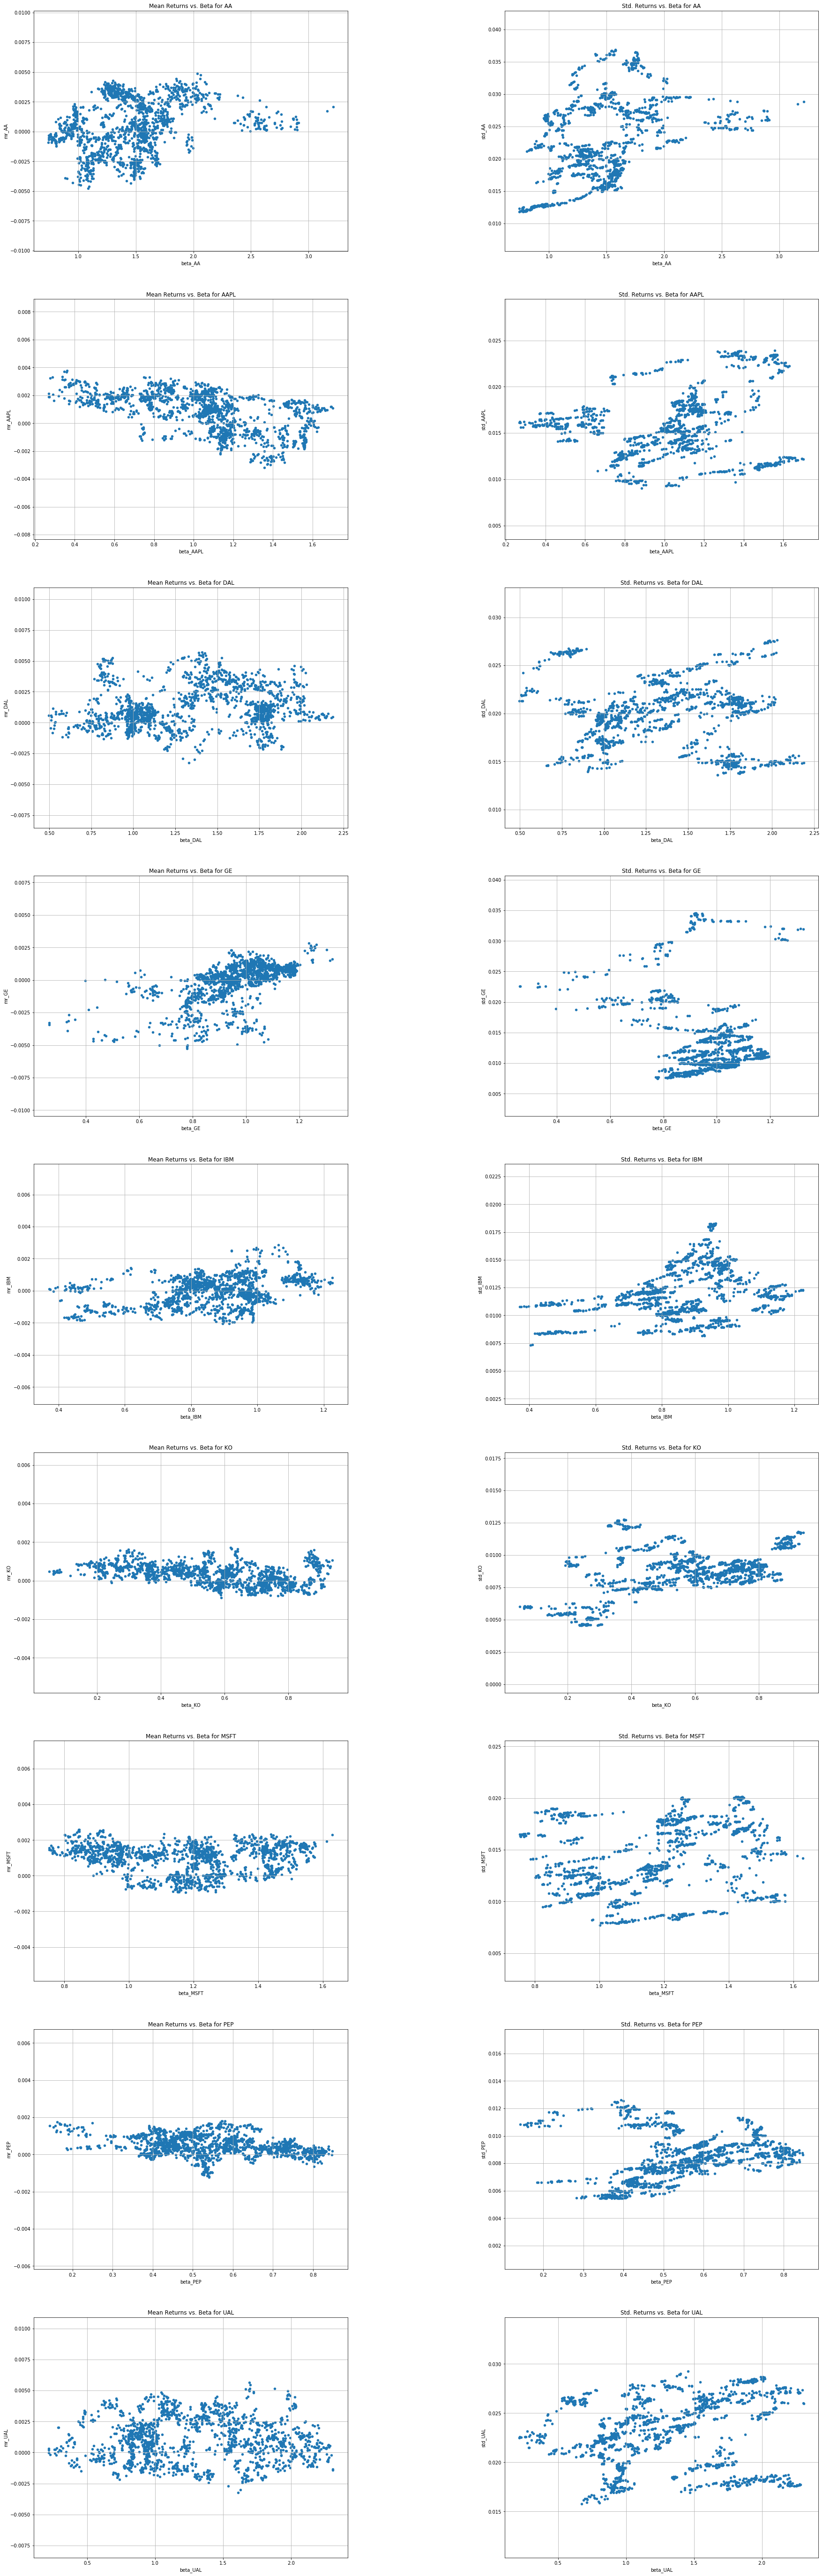

In [34]:
fig, axes  = plt.subplots(9, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.2)
row=col=ind=0
syms = list(beta_df.columns)
    
while row != 9:
    sym = syms[ind]
    data_df.plot(x='beta_' + sym, y='mr_' + sym, title='Mean Returns vs. Beta for ' + sym, figsize=(30, 100), ax=axes[row][0], kind='scatter', grid=True)
    data_df.plot(x='beta_' + sym, y='std_' + sym, title='Std. Returns vs. Beta for ' + sym, figsize=(30, 100), ax=axes[row][1], kind='scatter', grid=True)
    row = row + 1
    ind = ind + 1

plt.savefig('beta_plots.pdf')
plt.show()